## Probni program
Nastavimo zacetne pogoje za program. 
### Generator tock
Najprej generiramo nakljucno n tock v ravnini s pomocjo funkcije generate_random_points, ki vrne seznam z generiranim tock v prostoru $[0,9.00]\times[0,9.00]$.

In [169]:
import random
import math 

# Generiramo nakljucno n tock oblike (a.bc, d.ef) 
# v prostoru [0,9.00]x[0,9.00]

numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def generate_random_points(n):
    
    # returns list of n random points [a.bc, d.ef] on the interval [0, 9.99]x[0, 9.99]
    
    nodes = []
    
    for i in range(n):
        
        a = random.choice(numbers)
        b = random.choice(numbers)
        c = random.choice(numbers)
        d = random.choice(numbers)
        e = random.choice(numbers)
        f = random.choice(numbers)
        
        x = a + b * 1/10 + c * 1/100
        y = d + e * 1/10 + f * 1/100
        
        point = [float(x), float(y)]
        
        if point not in nodes:
            nodes.append(point)
            i += 1
            
    return nodes

Izberemo n tock:
[[2.07, 9.53], [4.4, 5.88], [2.8, 4.25], [1.04, 4.56], [5.23, 5.94], [2.41, 6.47], [2.42, 2.33], [8.4, 3.76], [2.52, 5.88], [9.76, 4.21]]


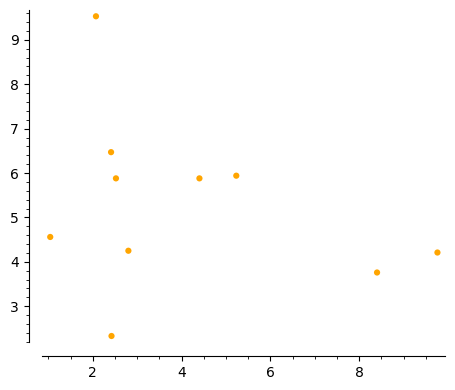

In [174]:
# Probamo to funckijo in narisemo tocke
print("Izberemo n tock:")
n = 10
list_points = generate_random_points(n)
print(list_points)

plot_points = list_plot(list_points, color = "orange", pointsize = 20)
show(plot_points, aspect_ratio=1)

### Razdalja med tockami
S pomocjo funkico distance, naredimo seznam-distances, ki vsebuje razdaljo med vsemi generirani tock.

In [175]:
def distance(p, q):
    return math.sqrt((p[0] - q[0])^2 + (p[1] - q[1])^2)

distances = [] # seznam seznamov, ki poda razdalje med vsemi tockami, 
               # razdalja med enake tocke je = 0

for i in range(len(list_points)):
    x = []
    for j in range(len(list_points)):
        x.append(distance(list_points[i], list_points[j]))
    distances.append(x)
    
print(distances)

[[0.0, 4.3302886739800615, 5.330225135958142, 5.075608337923642, 4.782645711319206, 3.0788309469667214, 7.208501924810729, 8.565150319755046, 3.677635109686658, 9.350855575828342], [4.3302886739800615, 0.0, 2.2840534144367117, 3.609986149557918, 0.8321658488546619, 2.075620389184882, 4.06483702010302, 4.5270741102835945, 1.8800000000000003, 5.6141339492391875], [5.330225135958142, 2.2840534144367117, 0.0, 1.7870926109186394, 2.9598986469134387, 2.25399645075142, 1.9572429588581997, 5.62139662361588, 1.6538742394752992, 6.960114941579629], [5.075608337923642, 3.609986149557918, 1.7870926109186394, 0.0, 4.411405671665213, 2.3505318547086316, 2.62246067654026, 7.4033505928059355, 1.9831288409984866, 8.727021255846692], [4.782645711319206, 0.8321658488546619, 2.9598986469134387, 4.411405671665213, 0.0, 2.8693727537564726, 4.574734965000705, 3.8472457680787695, 2.710664125265246, 4.849103009835942], [3.0788309469667214, 2.075620389184882, 2.25399645075142, 2.3505318547086316, 2.869372753756

### Presecisca daljic
Nasljedno funckijo nam pove ali se dve daljici (segmenti) sekajo. S pomocjo to funkcijo bomo naredili matriko presecisc.

In [176]:
# Funkcija orientation pove kaksna je orientacija med trema tockama
# orientacija je 0/1/-1 ce so tocke kolinearno/clockwise/counterclockwise orientirane

def orientation(p, q, r):

    val = ((q[1] - p[1]) * (r[0] - q[0])) - ((q[0] - p[0]) * (r[1] - q[1]))
    
    if val == 0 : 
        return 0
    elif val > 0:
        return 1
    else:
        return -1

# Funckija on_segment preveri ali se tocka r nahaja na segment med tocke p in q
# Vrni True/Flase ce je/ni na segmentu (p,q)

def on_segment(p, q, r):

    # r[0] je v intervalu (min(p[0], q[0]), max(p[0], q[0])) in
    # r[1] je v intervalu (min(p[1], q[1]), max(p[1], q[1]))

    if r[0] <= max(p[0], q[0]) and r[0] >= min(p[0], q[0]) and r[1] <= max(p[1], q[1]) and r[1] >= min(p[1], q[1]):
        return True
    return False

# Funckija intersects preveri ali se dva segmenta sekajo
# Vrne True/False ce se seg1 in seg2 sekajo/ne sekajo

def intersects(seg1, seg2):

    # seg1 = (p1, p2) = ((p1[0], p1[1]), ((p2[0], p2[1]))
    # seg2 = (p3, p4) = ((p3[0], p3[1]), ((p4[0], p4[1]))
    
    # get the points
    p1, q1 = seg1
    p2, q2 = seg2
    
    if p1 == p2:
        return False
    elif p1 == q2:
        return False
    elif q1 == p2:
        return False
    elif q1 == q2:
        return False
    
    # find all orientations
    
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # check general case 
    # (p1, q1, p2) and (p1, q1, q2) have different orientations and
    # (p2, q2, p1) and (p2, q2, p2) have different orientations
    
    if o1 != o2 and o3 != o4:
        return True
    
    # check special cases
    # (p1, q1, p2), (p1, q1, q2), (p2, q2, p1), (p2, q2, p2) are all collinear and
    # the x-projections of (p1, q1) and (p2, q2) intersect and
    # the y-projections of (p1, q1) and (p2, q2) intersect
    
    if o1 == 0 and on_segment(p1, q1, p2) : return True
    if o2 == 0 and on_segment(p1, q1, q2) : return True
    if o3 == 0 and on_segment(p2, q2, p1) : return True
    if o4 == 0 and on_segment(p2, q2, q1) : return True

    
    return False

# Naredimo matrika(seznam senzamov) ki nam pove ali se dve daljici sekajo med saboj
# Ce se daljici seg1 in seg2, med tocki p1, p2 in p3, p4 sekajo 
# potem je vrednost v matriki 1, sicer je 0

intersection = []
for i in range(len(list_points)):
    for j in range(len(list_points)):
        x = []
        for k in range(len(list_points)):
            for l in range(len(list_points)):
                
                seg1 = (list_points[i], list_points[j])
                seg2 = (list_points[k], list_points[l])
                
                if intersects(seg1, seg2):
                    x.append(1)
                else:
                    x.append(0)
                    
        intersection.append(x)
    

In [177]:
seg1 = (list_points[0], list_points[1])
seg2 = (list_points[0], list_points[3])
intersects(seg1, seg2)

False

### Linearni program
Poskusimo linearni program brez narejeni graph.

In [ ]:
p = MixedIntegerLinearProgram()
x = p.new_variable(binary=True)

# define the objective function
p.set_objective(sum(x[i*len(list_points) + j] * distances[i][j] for i in range(len(list_points)) for j in range(len(list_points))))

# pogoji
for v in range(len(list_points)):
    p.add_constraint(sum(x[i*len(list_points) + j] for j in range(len(list_points)) if (i!=j)) == 2)
            
#while True:
    # rabimo break
    x_sol = p.get_values(x)
    
    #p.add_constraint(sum(x[i*len(list_points) + j]) for j in range(len(list_points)) if (i!=j)) >= 2

value = p.solve()
solution = p.get_values(x)

### Drugi poskus za linearni program
Poskusimo program od vira: https://www.steinertriples.fr/ncohen/tut/LP_examples/, skozi kateri se uporablja objekt graph.


{0: [1, 2, 3, 4, 5, 6, 7, 8, 9], 1: [0, 2, 3, 4, 5, 6, 7, 8, 9], 2: [0, 1, 3, 4, 5, 6, 7, 8, 9], 3: [0, 1, 2, 4, 5, 6, 7, 8, 9], 4: [0, 1, 2, 3, 5, 6, 7, 8, 9], 5: [0, 1, 2, 3, 4, 6, 7, 8, 9], 6: [0, 1, 2, 3, 4, 5, 7, 8, 9], 7: [0, 1, 2, 3, 4, 5, 6, 8, 9], 8: [0, 1, 2, 3, 4, 5, 6, 7, 9], 9: [0, 1, 2, 3, 4, 5, 6, 7, 8]}


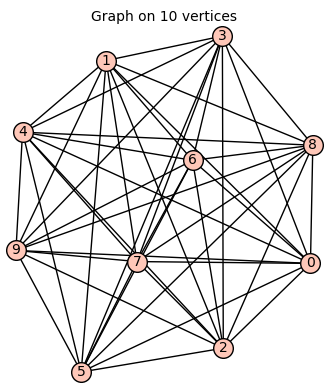

In [178]:
# Naredimo graf od n=10 vozlisca, 
# tak da so vse vozlisca povezane mad saboj (connected graph)

x = {}
for i in range(len(list_points)):
    y = []
    for j in range(len(list_points)):
        if i != j:
            y.append(j)
            j += 1
            #print(y)
        x.update({i:y}) 
print(x)
g = Graph(x)
g

In [150]:
# Linearni program

p = MixedIntegerLinearProgram()
x = p.new_variable(binary=True)

edges = g.edges_incident(v, labels = False)
# define the objective function
# edges = g.edges_incident(v, labels = False)
# p.set_objective(sum(x[Set(e)] for e in edges))
# p.set_objective(sum(x[Set(e)] * distances[ for e in edges))

# pogoji
for v in g:
    edges = g.edges_incident(v, labels = False)
    #print(edges)
    p.add_constraint(sum(x[Set(e)] for e in edges) == 2)

p.solve()

while True:
    
    x_sol = p.get_values(x)
    edges = [e for e,i in x_sol.items() if i == 1]
    #print(edges)
    g_temp = g.subgraph(vertices = g.vertices(), edges = edges)
    cc = g_temp.connected_components()
    
    if len(cc) == 1:
        break
        
    boundary = g.edge_boundary(cc[0], labels = False)
    p.add_constraint(sum([x[Set(e)] for e in boundary]) >= 2)
    p.solve()
    
print(g_temp.edges(labels = False))
print(p.get_values(x))


KeyboardInterrupt: 